Examen de Programación para ingreso a Maestría en Ciencia de Datos en la Unison
by Gaspar Albetro Munguia Palma

Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as mpl
import datetime
%matplotlib inline

Lectura de base de datos

In [44]:
#Quite el encoding para poder importar la base de datos, ya que no me agarraba
df = pd.read_csv('covid-data/200511COVID19MEXICO.csv',encoding='unicode_escape',parse_dates=True)


Queries para definir datos que vamos a sacar

In [18]:
df_sonora = df.query('ENTIDAD_UM==26')
print(df_sonora)


entidades={26,8,19,21}
df_Sonora_Chihuahua_NuevoLeon_Puebla = df.query('ENTIDAD_UM in @entidades & TIPO_PACIENTE==2')


       FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
335             2020-05-11      043561       2       4          26     2   
956             2020-05-11      1999a7       2       4          26     2   
1045            2020-05-11      1e70bd       2       4          26     2   
1160            2020-05-11      07b5a7       2       4          26     1   
1288            2020-05-11      1b9ce4       2       4          26     1   
...                    ...         ...     ...     ...         ...   ...   
135039          2020-05-11      122c12       1      12          26     1   
135046          2020-05-11      1b27f2       1      12          26     2   
135047          2020-05-11      0f5a94       1      12          26     2   
135068          2020-05-11      1bd464       1      12          26     2   
135069          2020-05-11      1e4798       1      12          26     2   

        ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ...  \
335             

Workplace

In [26]:
df1 = df_sonora[['FECHA_ACTUALIZACION','FECHA_SINTOMAS','FECHA_DEF']]
df1.set_axis(['Fecha_Actualización', 'Fecha_Sintomas','Fecha_Defuncion'],axis=1)
df1.to_csv('tabla1.csv')


df2 = df_Sonora_Chihuahua_NuevoLeon_Puebla.groupby(['ENTIDAD_UM']).count()
df2.drop(df2.iloc[:, 1:34], inplace = True, axis = 1)
df2.columns=['Cantidad']
df2.index.names=['Estados']
map_dict = {8: 'Chihuahua', 19: 'Nuevo Leon', 26: 'Sonora', 21: 'Puebla'}
df2.index=df2.index.to_series().map(map_dict)
df2.to_csv('tabla2.csv')






Figuras

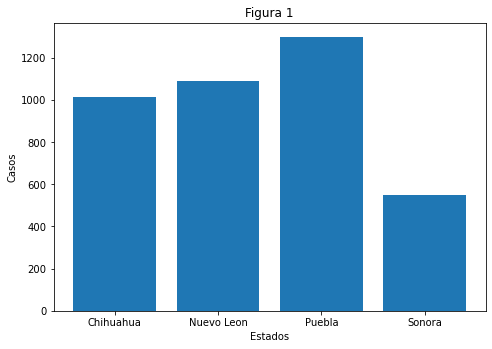

In [37]:
barras = mpl.figure()
ax = barras.add_axes([0,0,1,1])
ax.bar(df2.index,df2.Cantidad)
mpl.xlabel('Estados')
mpl.ylabel('Casos')
mpl.title('Figura 1')
mpl.savefig('figura1.png',bbox_inches='tight',facecolor='w')

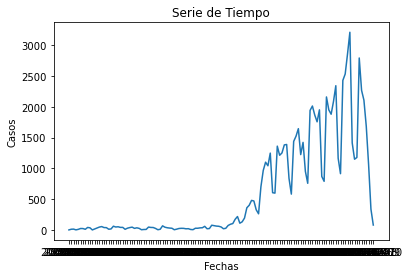

In [61]:
confirmados = df.query("RESULTADO==2")
fechas = confirmados.groupby('FECHA_INGRESO').count()
fechas.drop(fechas.iloc[:, 1:34], inplace = True, axis = 1)
fechas.columns=['Cantidad']

mpl.plot(fechas.index,fechas.Cantidad)
mpl.title("Serie de Tiempo")
mpl.xlabel("Fechas")
mpl.ylabel("Casos")
mpl.savefig('figura2.png',bbox_inches='tight',facecolor='w')
